In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# for model comparison
from sklearn import metrics
# for decision tree model
from sklearn import tree

# for decision tree visualizaiton
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz


# for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# for random search
from sklearn.ensemble import RandomForestClassifier


In [2]:
drug = pd.read_csv("drug.csv")

In [3]:
drug.shape

(200, 6)

In [4]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
drug.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [6]:
drug.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,DrugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,DrugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,DrugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [7]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
drug.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [11]:
drug.Sex.unique()

array(['F', 'M'], dtype=object)

In [12]:
drug.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [13]:
drug.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [14]:
drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:>

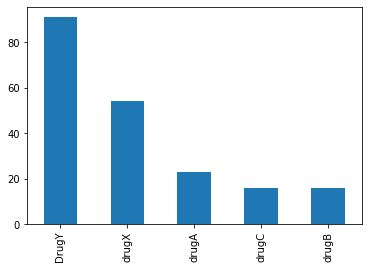

In [15]:
drug['Drug'].value_counts().plot.bar()                

<AxesSubplot:>

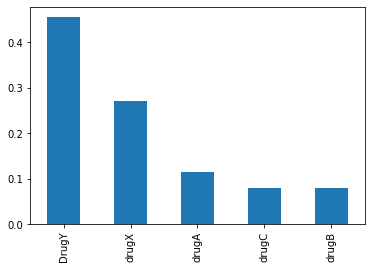

In [16]:
drug['Drug'].value_counts(normalize=True).plot.bar()

In [17]:
gr = drug.groupby(['Drug'])

In [18]:
gr.first()

,Age,Sex,BP,Cholesterol,Na_to_K
Drug,,,,,
DrugY,23,F,HIGH,HIGH,25.355
drugA,43,M,HIGH,HIGH,13.972
drugB,74,M,HIGH,HIGH,9.567
drugC,47,M,LOW,HIGH,13.093
drugX,28,F,NORMAL,HIGH,7.798


In [19]:
gr.get_group('DrugY')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
4,61,F,LOW,HIGH,18.043,DrugY
6,49,F,NORMAL,HIGH,16.275,DrugY
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY
...,...,...,...,...,...,...
188,65,M,HIGH,NORMAL,34.997,DrugY
189,64,M,HIGH,NORMAL,20.932,DrugY
190,58,M,HIGH,HIGH,18.991,DrugY
192,72,M,LOW,HIGH,16.310,DrugY


In [20]:
corr= drug.corr()

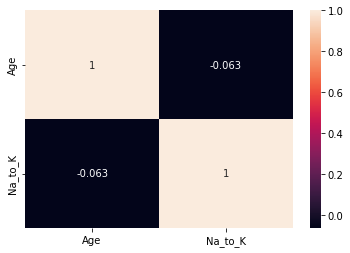

In [21]:
ab=sns.heatmap(corr, annot=True)

<AxesSubplot:>

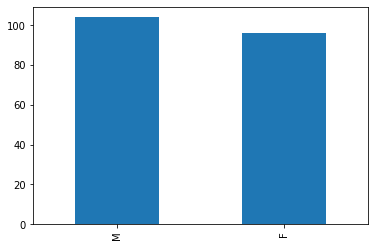

In [22]:
drug['Sex'].value_counts().plot.bar()

<AxesSubplot:>

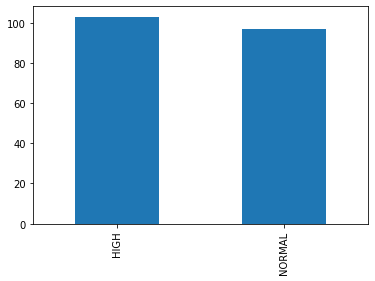

In [23]:
drug['Cholesterol'].value_counts().plot.bar()

<AxesSubplot:>

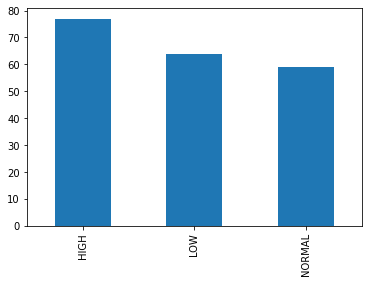

In [24]:
drug['BP'].value_counts().plot.bar()

<AxesSubplot:xlabel='Drug'>

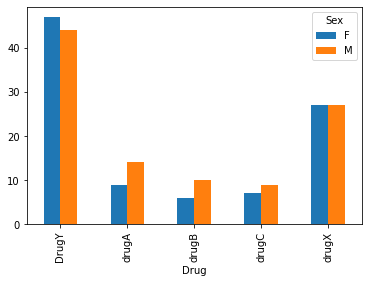

In [25]:
Gender=pd.crosstab(drug['Drug'],drug['Sex']) 
Gender.plot(kind='bar')

<AxesSubplot:xlabel='Cholesterol'>

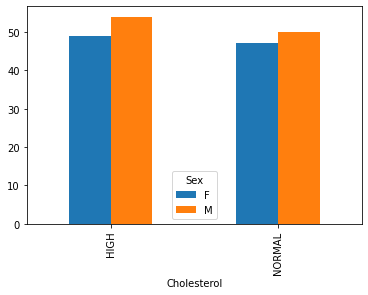

In [26]:
Gc=pd.crosstab(drug['Cholesterol'],drug['Sex']) 
Gc.plot(kind='bar')

<AxesSubplot:xlabel='BP'>

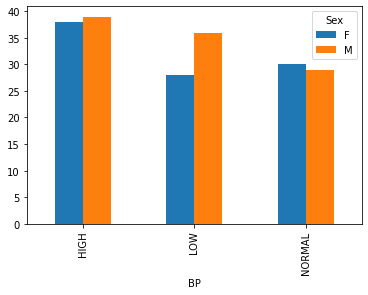

In [27]:
Gb=pd.crosstab(drug['BP'],drug['Sex']) 
Gb.plot(kind='bar')

<AxesSubplot:xlabel='Cholesterol'>

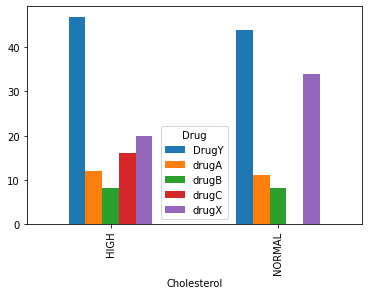

In [28]:
Chol=pd.crosstab(drug['Cholesterol'],drug['Drug']) 
Chol.plot(kind='bar')

<AxesSubplot:xlabel='BP'>

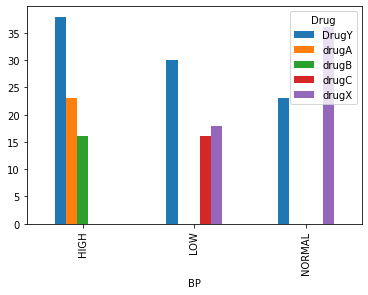

In [29]:
bp=pd.crosstab(drug['BP'],drug['Drug']) 
bp.plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

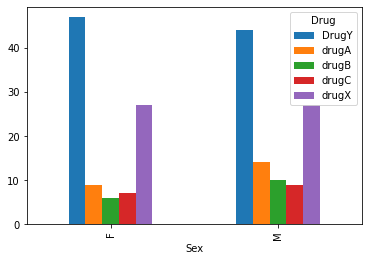

In [30]:
Gender=pd.crosstab(drug['Sex'],drug['Drug']) 
Gender.plot(kind='bar')

<AxesSubplot:xlabel='BP'>

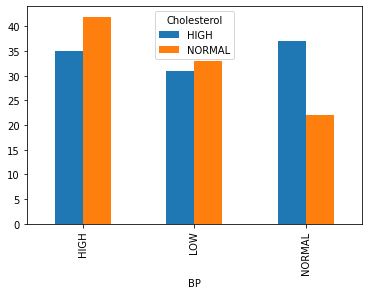

In [31]:
bc=pd.crosstab(drug['BP'],drug['Cholesterol']) 
bc.plot(kind='bar')

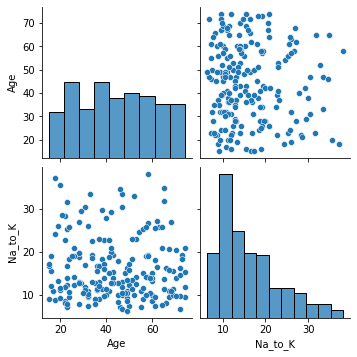

In [32]:
sns.pairplot(drug)

In [33]:
drugnew=drug

In [34]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
drugnew["Drug"] = encoder.fit_transform(drugnew["Drug"])

In [35]:
drugnew.Drug.unique()

array([0, 3, 4, 1, 2])

In [36]:
drugnew['Sex']=encoder.fit_transform(drugnew.loc[:,['Sex']])
drugnew['BP']=encoder.fit_transform(drugnew.loc[:,['BP']])
drugnew['Cholesterol']=encoder.fit_transform(drugnew.loc[:,['Cholesterol']])

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
x = drugnew.drop('Drug',axis=1)
y = drugnew['Drug']

In [38]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [39]:
model=LogisticRegression()

In [40]:
model.fit(train_x,train_y)

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
prd= model.predict(train_x)
prd

array([0, 0, 4, 0, 4, 0, 2, 0, 4, 4, 4, 0, 1, 1, 1, 4, 0, 4, 4, 0, 1, 1,
       1, 3, 2, 0, 3, 0, 2, 4, 4, 3, 0, 0, 0, 0, 2, 1, 0, 4, 3, 1, 0, 0,
       0, 2, 4, 2, 4, 2, 0, 0, 0, 1, 0, 2, 0, 2, 4, 0, 0, 0, 0, 0, 1, 1,
       4, 4, 0, 4, 0, 0, 3, 0, 3, 4, 1, 1, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 4, 4, 0, 1, 4, 0, 0, 0, 0, 4, 0, 4, 2, 2, 0, 4, 1, 4, 2, 1, 1,
       0, 0, 3, 4, 0, 4, 3, 4, 0, 0, 0, 4, 0, 1, 0, 4, 4, 2, 0, 2, 0, 1,
       0, 0, 4, 4, 0, 4, 3, 0])

In [42]:
pred = model.predict(test_x)

In [43]:
accuracy= accuracy_score(train_y,prd)
accuracy

0.9071428571428571

In [44]:
accuracytest= accuracy_score(test_y,pred)
accuracytest

0.8666666666666667

In [45]:
cnf_matrix = metrics.confusion_matrix(test_y, pred)
cnf_matrix

array([[29,  0,  1,  0,  0],
       [ 0,  4,  1,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 1,  0,  0,  1,  2],
       [ 2,  0,  0,  0, 16]], dtype=int64)

In [46]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, x, y):
    return accuracy_score(y, estimator.predict(x))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, x, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.8  0.7  0.7  0.7  0.7  0.7  0.7  0.75 0.7  0.75]
Mean Score: 0.72
Gaussian NB
Scores: [0.8  0.85 0.85 0.9  0.9  0.85 0.9  0.9  0.85 0.85]
Mean Score: 0.8649999999999999
Random Forest
Scores: [1.   1.   1.   1.   1.   1.   1.   0.95 0.95 1.  ]
Mean Score: 0.99


Accuracy on train data by Logistic Regression Classifier: 90.71428571428571
Accuracy on test data by Logistic Regression Classifier: 86.66666666666667


C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


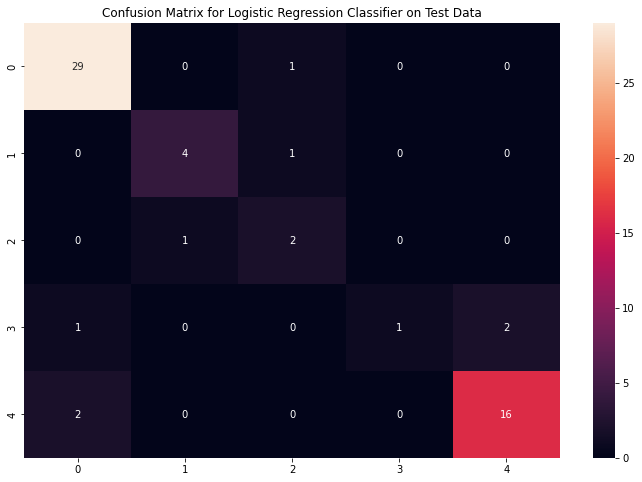

In [48]:
# Training and testing Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)
preds = lr_model.predict(test_x)
 
print(f"Accuracy on train data by Logistic Regression Classifier\
: {accuracy_score(train_y, lr_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by Logistic Regression Classifier\
: {accuracy_score(test_y, preds)*100}")
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression Classifier on Test Data")
plt.show()

Accuracy on train data by SVM Classifier: 67.85714285714286
Accuracy on test data by SVM Classifier: 80.0


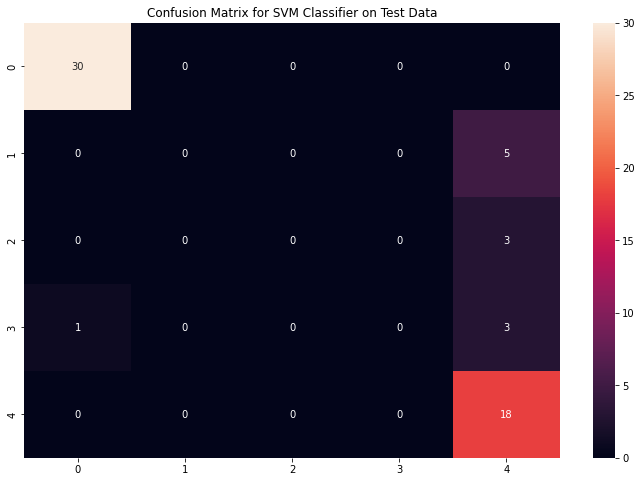

In [49]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(train_x, train_y)
preds = svm_model.predict(test_x)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(train_y, svm_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(test_y, preds)*100}")
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 83.57142857142857
Accuracy on test data by Naive Bayes Classifier: 90.0


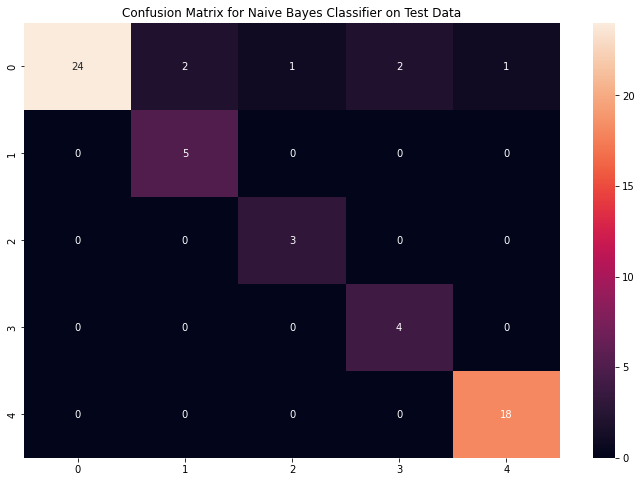

In [50]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(train_x, train_y)
preds = nb_model.predict(test_x)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(train_y, nb_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(test_y, preds)*100}")
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


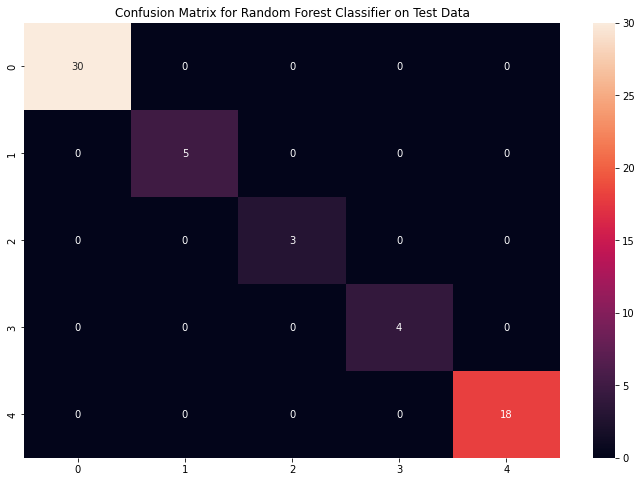

In [51]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(train_x, train_y)
preds = rf_model.predict(test_x)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(train_y, rf_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(test_y, preds)*100}")
 
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on train data by Stochastic Gradient Descent Classifier: 47.14285714285714
Accuracy on test data by Stochastic Gradient Descent Classifier: 58.333333333333336


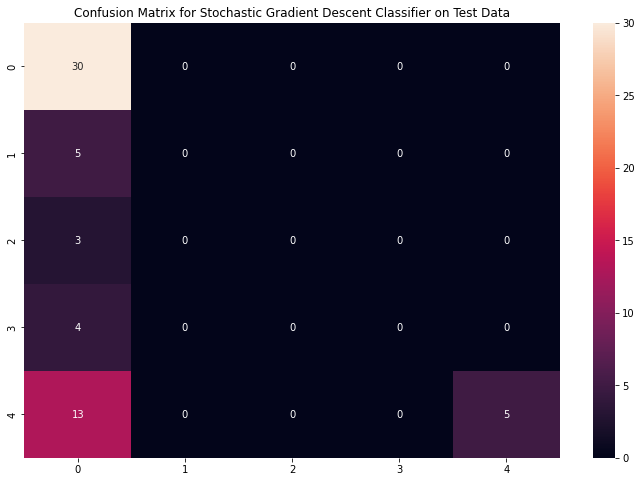

In [52]:
# Training and testing Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_model.fit(train_x, train_y)
preds = sgd_model.predict(test_x)
print(f"Accuracy on train data by Stochastic Gradient Descent Classifier\
: {accuracy_score(train_y, sgd_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by Stochastic Gradient Descent Classifier\
: {accuracy_score(test_y, preds)*100}")
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Stochastic Gradient Descent Classifier on Test Data")
plt.show()

Accuracy on train data by K-Nearest Neighbours Classifier: 72.85714285714285
Accuracy on test data by K-Nearest Neighbours Classifier: 76.66666666666667


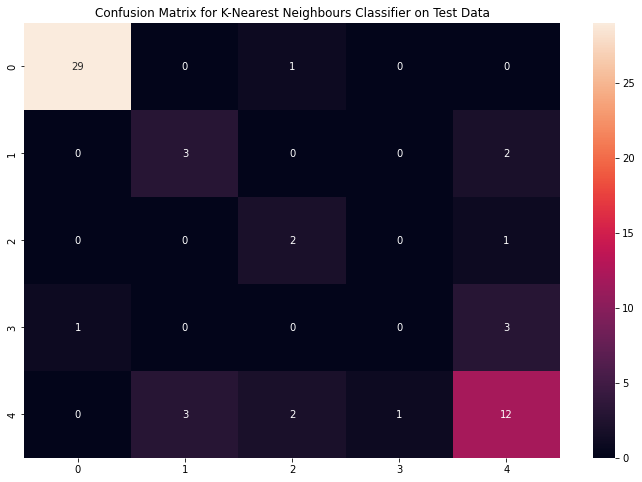

In [53]:
# Training and testing K-Nearest Neighbours Classifier
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(train_x, train_y)
preds = knn_model.predict(test_x)
print(f"Accuracy on train data by K-Nearest Neighbours Classifier\
: {accuracy_score(train_y, knn_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by K-Nearest Neighbours Classifier\
: {accuracy_score(test_y, preds)*100}")
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for K-Nearest Neighbours Classifier on Test Data")
plt.show()

Accuracy on train data by Decision Tree Classifier: 90.71428571428571
Accuracy on test data by Decision Tree Classifier: 86.66666666666667


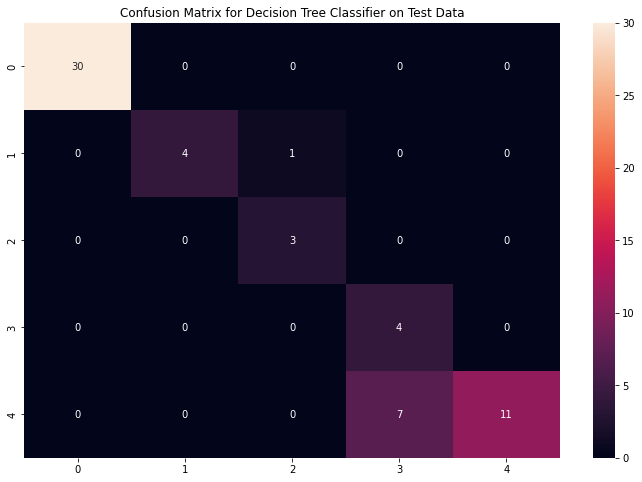

In [54]:
# Training and testing Decision Tree Classifier
dtree_model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
dtree_model.fit(train_x, train_y)
preds = dtree_model.predict(test_x)
print(f"Accuracy on train data by Decision Tree Classifier\
: {accuracy_score(train_y, dtree_model.predict(train_x))*100}")
 
print(f"Accuracy on test data by Decision Tree Classifier\
: {accuracy_score(test_y, preds)*100}")
cf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Data")
plt.show()

In [55]:
# Combining results together

In [56]:
from sklearn import linear_model, neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import time
algolist = list()
fprlist = list()
tprlist = list()

In [57]:
def setFigurePlotSize(x, y):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

def plotROCCurve(fpr, tpr, algo):
    
    setFigurePlotSize(12, 8)
    plt.title('Receiver Operating Characteristic')
    
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], label='%s AUC = %0.3f' %(algo[i], auc(fpr[i], tpr[i])))
        
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def printAlgorithmReport(algo, roc_auc, score, conf_mat, class_report):
    
    print('\n       Classfier ROC, AUC: %0.3f ' %(roc_auc))
    print('   Classfier Accuracy Score: %0.3f ' %(score))
    print(' Classfier Confusion Matrix:\n\n %s \n' %(conf_mat))
    print(' Classfier Classification Report:\n\n %s ' %(class_report))

In [58]:
classifier_algorithms = {'LogisticRegression' :linear_model.LogisticRegression(),
                         'KNeighborsClassifier': neighbors.KNeighborsClassifier(n_neighbors=15),
                         'RandomForestClassifier': RandomForestClassifier(random_state=18),
                        'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15),
                        'SupportVectorClassifier' : SVC(),
                        'Stochastic Gradient':SGDClassifier(loss='modified_huber', shuffle=True,random_state=101),
                        'Naive Bayes':GaussianNB()}


******************** Algorithm :: LogisticRegression **********
Model Training   Started At Fri Jun  3 22:28:42 2022
Model Training Completed At Fri Jun  3 22:28:42 2022
LogisticRegression()

       Classfier ROC, AUC: 0.598 
   Classfier Accuracy Score: 0.867 
 Classfier Confusion Matrix:

 [[29  0  1  0  0]
 [ 0  4  1  0  0]
 [ 0  1  2  0  0]
 [ 1  0  0  1  2]
 [ 2  0  0  0 16]] 

 Classfier Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.80      0.80      0.80         5
           2       0.50      0.67      0.57         3
           3       1.00      0.25      0.40         4
           4       0.89      0.89      0.89        18

    accuracy                           0.87        60
   macro avg       0.82      0.71      0.72        60
weighted avg       0.88      0.87      0.86        60
 

******************** Algorithm :: KNeighborsClassifier **********
Model Training   Sta

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Training Completed At Fri Jun  3 22:28:43 2022
RandomForestClassifier(random_state=18)

       Classfier ROC, AUC: 0.545 
   Classfier Accuracy Score: 1.000 
 Classfier Confusion Matrix:

 [[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]] 

 Classfier Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60
 

******************** Algorithm :: DecisionTreeClassifier **********
Model Training   Started At Fri Jun  3 22:28:43 2022
Model Training Completed At Fri Jun  3 22:28:43 2022
DecisionTre

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\urvas\anac

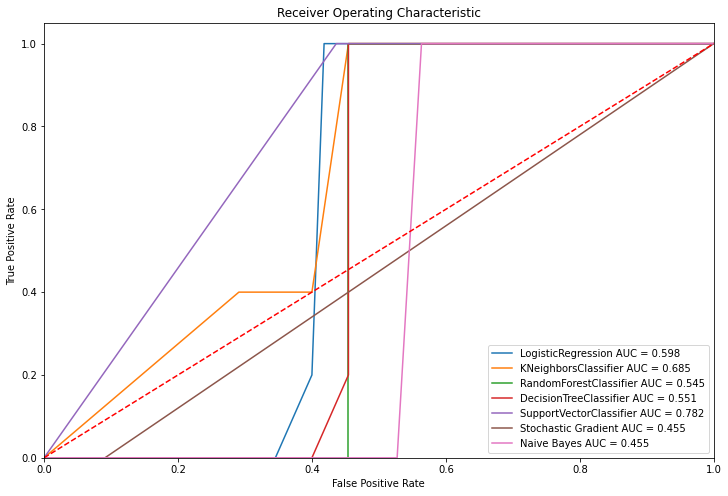

In [59]:
%matplotlib inline
for algo, model in classifier_algorithms.items():

    print('\n******************** Algorithm :: %s **********' %(algo))
    print('Model Training   Started At {0}'.format(time.asctime(time.localtime(time.time()))))
    model.fit(train_x, train_y)
    print('Model Training Completed At {0}'.format(time.asctime(time.localtime(time.time()))))
    print(model)
    score = model.score(test_x, test_y)
    pred = model.predict(test_x)
    conf_mat = confusion_matrix(test_y, pred)
    fpr, tpr, thresholds = roc_curve(test_y, pred,pos_label=1)
    roc_auc =  auc(fpr, tpr)
    cls_rpt = classification_report(test_y, pred)
        
    algolist.append(algo)
    fprlist.append(fpr)
    tprlist.append(tpr)

    printAlgorithmReport(algo, roc_auc, score, conf_mat, cls_rpt)
    
plotROCCurve(fprlist, tprlist, algolist)